In [274]:
import sys
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# A simple classification model

by: Andres Ethorimn Lobarb

## <font color='blue'>First Part</font>

___

In this part we will explore and manipulate the data for cleaning and defining the variables we will use as features; if you have any doubt, please get in touch emailing me at <aethorimn@gmail.com>. __<font color='purple'>THANK YOU VERY MUCH FOR LOOKING THIS WORK!</font>__

___


In [280]:
#IMPORTANT! - add the project folder to the notebook path, do not comment this line!

sys.path.append('../')


___

### Gathering Fuction

The gatherig function is defined in the `/src/data` package and is useful to utomatically <font color=green>download the datasets</font>. Once you have downloaded the information, commenting the function is higly recommendable.

___


In [281]:
#from src.data import make_dataset
#loc = '../data'
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip'
#make_dataset.make_dataset(loc=loc, url=url)


___

### Exploring the diabetes record

We can explore the data right now —Keep in mind that we need to highlight the most important features and get riff of the irrelevant ones when possible.

___


In [282]:
df = pd.read_csv('../data/diabetic_data.csv')

#df.columns #Just run this to make the indentification of which columns will be used in the model easier.

print(df.shape)
df

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [283]:
#Let us check if we have any duplicated valued based on the df shape and the patient's number column

len(df['patient_nbr'].unique())

71518


___

As we can see above, there're more entries than unique patient numbers, so it means we actually have patients that have cane to the hospital more than once. To avoid confussion, let us just keep the firt entry related with each individual.

Now that we know there are rare values in the columns, it would be good to search for evetualities in other important categories. Let us say for instance, <font color='maroon'>'race'</font>. We can look that the database shows the missing values as __?__, so this character is going to be our target for finding irregularities:

___


In [284]:
df = df.drop_duplicates(subset='patient_nbr', keep='first')
print(df.shape)
df

(71518, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),?,1,1,7,9,?,?,50,2,33,0,0,0,574,574,250.02,9,None,>7,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),?,1,1,7,14,MD,?,73,6,26,0,1,0,592,599,518,9,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,MD,?,46,6,17,1,1,1,996,585,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,MC,?,76,1,22,0,1,0,292,8,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [285]:
#Looking for '?' entrien in race column:

df.groupby(['race']).count()['encounter_id']

race
?                   1948
AfricanAmerican    12887
Asian                497
Caucasian          53491
Hispanic            1517
Other               1178
Name: encounter_id, dtype: int64

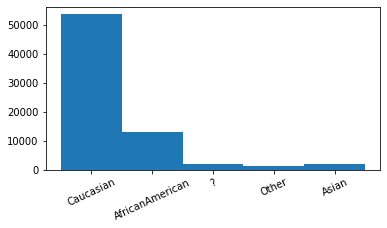

In [286]:
ax = df['race'].hist(grid=False, xrot=25, figsize=(6, 3), bins=range(len(df.race.unique())), align='left') 

In [287]:
df = df.replace({'race':'?'}, 'Other')

In [288]:
df.groupby(['gender']).count()['encounter_id']

gender
Female             38025
Male               33490
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [289]:
#Since non-binary genders were not considered when the data was collected, 
#we can rip the unknown/missing values off.

df = df[df['gender'] != 'Unknown/Invalid']

In [290]:
df.groupby(['age']).count()['encounter_id']

age
[0-10)        154
[10-20)       535
[20-30)      1127
[30-40)      2699
[40-50)      6878
[50-60)     12466
[60-70)     15959
[70-80)     18208
[80-90)     11589
[90-100)     1900
Name: encounter_id, dtype: int64

In [291]:
df.groupby(['weight']).count()['encounter_id']

weight
>200             3
?            68662
[0-25)          46
[100-125)      566
[125-150)      131
[150-175)       33
[175-200)        9
[25-50)         89
[50-75)        781
[75-100)      1195
Name: encounter_id, dtype: int64

In [292]:
df.groupby(['citoglipton']).count()['encounter_id']

citoglipton
No    71515
Name: encounter_id, dtype: int64

In [293]:
df.groupby(['examide']).count()['encounter_id']

examide
No    71515
Name: encounter_id, dtype: int64

In [298]:
#Look at this! we can have a free scale distribution from the data of this column. Notwithstanding, is it not the same
#than the following one?

print(df.groupby(['num_lab_procedures']).count()['encounter_id'])

#Hmmm... the results are not impressive at all, but I'm still wonderin why there is a column for different kinds
#of procedures

df.groupby(['num_procedures']).count()['encounter_id']

num_lab_procedures
1      2285
2       779
3       508
4       294
5       212
       ... 
114       2
118       1
120       1
121       1
132       1
Name: encounter_id, Length: 116, dtype: int64


num_procedures
0    31430
1    14302
2     9149
3     7183
4     3056
5     2439
6     3956
Name: encounter_id, dtype: int64

In [304]:
#The same occurs with types of visits:

print(df.groupby(['number_outpatient']).count()['encounter_id'])

#Again, we can observe somethinf like a power law dist. Now, with the others...

print(df.groupby(['number_inpatient']).count()['encounter_id'])
print(df.groupby(['number_emergency']).count()['encounter_id'])

#For the three variables we found pretty regular behabiour of the data, it may be useful for bayond analysis!

number_outpatient
0     62209
1      4867
2      2025
3      1116
4       585
5       288
6       128
7        73
8        57
9        37
10       28
11       19
12       14
13       13
14       10
15       10
16        8
17        4
18        2
19        1
20        4
21        2
22        2
23        1
24        2
25        1
26        1
27        2
29        1
33        2
35        1
36        1
42        1
Name: encounter_id, dtype: int64
number_inpatient
0     63074
1      5962
2      1547
3       489
4       236
5       102
6        56
7        19
8        13
9         8
10        5
11        2
12        2
Name: encounter_id, dtype: int64
number_emergency
0     66311
1      3965
2       804
3       246
4        96
5        33
6        26
7         8
8         9
9         4
10        5
11        2
13        1
16        1
20        1
25        1
37        1
42        1
Name: encounter_id, dtype: int64



___

The previous results show us that <font color='maroon'>'weight'</font>, <font color='maroon'>'citoglipton'</font>, and <font color='maroon'>'examide'</font> do not show relevant infromation for the analysis, so we can dispense with them. Now, we need also dispense with columns with burocratic/administrative information as it does give no further information for this study.

### Simplifiying some data

Previously, we saw there are some columns that represent pretty similar data. Moreover, the data in these columns suggest regular behaviour amongst them. To try to simplify the final feature number, we shall join the information of the _procedures_ columns (<font color='maroon'>'mun_lab_procedures'</font>, and <font color='maroon'>'num_procedures'</font>) in a column maned <font color='maroon'>'procedures'</font>. We will do the same treatement for _visiting_ columns (<font color='maroon'>'number_outpatient'</font>, <font color='maroon'>'number_inpatient'</font>, and <font color='maroon'>'number_emergency'</font>) in a column named <font color='maroon'>'visits'</font>.   

___


In [305]:
#Dispensing with inrrelevant data

df = df.drop(columns=['weight', 'encounter_id', 'patient_nbr', 'payer_code', 
                      'medical_specialty', 'citoglipton', 'examide'])

In [306]:
df['procedures'] = df['num_lab_procedures'] + df['num_procedures']
df['visits'] = df['number_outpatient'] + df['number_inpatient'] + df['number_emergency']

In [307]:
pd.set_option('display.max_columns', None)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,procedures,visits
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,41,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,59,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,16,3
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,45,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,None,>7,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30,52,0
101755,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,79,1
101756,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,52,3
101758,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,77,1


In [308]:
#Are there any classic np.nan value, or there are only '?' for no info? Let us check for Nil values:

for col in df.columns:
    if df[col].isnull().values.any() is True:
        print(f'{col} HAVE NULL VALUES!')
    else:
        print(f'{col} is ok')

race is ok
gender is ok
age is ok
admission_type_id is ok
discharge_disposition_id is ok
admission_source_id is ok
time_in_hospital is ok
num_lab_procedures is ok
num_procedures is ok
num_medications is ok
number_outpatient is ok
number_emergency is ok
number_inpatient is ok
diag_1 is ok
diag_2 is ok
diag_3 is ok
number_diagnoses is ok
max_glu_serum is ok
A1Cresult is ok
metformin is ok
repaglinide is ok
nateglinide is ok
chlorpropamide is ok
glimepiride is ok
acetohexamide is ok
glipizide is ok
glyburide is ok
tolbutamide is ok
pioglitazone is ok
rosiglitazone is ok
acarbose is ok
miglitol is ok
troglitazone is ok
tolazamide is ok
insulin is ok
glyburide-metformin is ok
glipizide-metformin is ok
glimepiride-pioglitazone is ok
metformin-rosiglitazone is ok
metformin-pioglitazone is ok
change is ok
diabetesMed is ok
readmitted is ok
procedures is ok
visits is ok



___

### Labels for features

Now, to perforn our classificaton we need to reduce the complexity (or redundancy) of certain features by assigning labels to them. For instance, for the <font color='maroon'>'AICresult'</font> and the <font color='maroon'>'max_glu_serum'</font> tests, we can see values that suggest:

1. The patient shows hits to be diabetic (for an A1C-test result >7, and a Max glucose in serum result >200 mg/l).
2. The patient shows normal values for the previous indicators (noted here as 'Norm').
3. The patient did not take the test (noted here as 'None')

With this in mind, we can procede to define hierarchical categories as <font color='green'>1</font> whenever the results says its __POSSITIVE__, <font color='green'>0</font> when it says it is __NEUTRAL__, or <font color='green'>-1</font> when it says it is __NEGATIVE__. On the other hand, when we get Nil —or 'None' in this case— results, we define it using <font color='green'>-2</font>.

For the target variable <font color='maroon'>'readmitted'</font> we can either use the three cathegories or just focues in two. In this case, I decant to use the second option for agility, so I will simplify the outcome using the booleans <font color='green'>1</font> for readmitted whether the time it took, and <font color='maroon'>0</font> when not readmitted.

Finally, for pure categorical variables, which are <font color='maroon'>'age'</font> and <font color='maroon'>'race'</font>, and for more complex categories such as <font color='maroon'>'diag_1'</font>, <font color='maroon'>'diag_2'</font>, and <font color='maroon'>'diag_3'</font>, the best would be use preprocessing methods like `sklearn.preprocessing.LabelEncoder` for labeling. 

___


In [ ]:
df['diabetesMed'].unique()

In [315]:
df = df.replace(to_replace={'A1Cresult':{'>8':1, '>7':1, 'Norm':0, 'None':-2}, 
                 'max_glu_serum':{'>300':1, '>200':1, 'Norm':0, 'None':-2}})

for col in df.columns[19:40]:
    df = df.replace(to_replace={col:{'Up':1, 'Steady':0, 'Down':-1, 'No':-2}})
    
df = df.replace(to_replace={'diabetesMed':{'Yes':1, 'No':0}})
df = df.replace(to_replace={'readmitted':{'>30':1, '<30':1, 'NO':0}})

for col in ('age', 'gender', 'diag_1', 'diag_2', 'diag_3'):
    df[col+'_cat'] = LabelEncoder().fit_transform(df[col])

In [316]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,procedures,visits,age_cat,gender_cat,diag_1_cat,diag_2_cat,diag_3_cat
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,No,0,0,41,0,0,0,123,630,644
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,1,1,59,0,1,0,141,76,112
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,No,1,0,16,3,2,0,444,75,735
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,1,0,45,0,3,1,542,91,238
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,Ch,1,0,51,0,4,1,54,22,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,-2,1,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,Ch,1,1,52,0,7,0,385,365,79
101755,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,-2,1,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,1,1,79,1,4,0,401,386,327
101756,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,No,1,1,52,3,6,0,673,375,238
101758,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,1,0,77,1,8,0,156,516,157



___


### Exploring the IDs mappind

From IDs mapping we fing somethin interesting, if we compare the <font color='maroon'>'discharge_dispossition_id'</font> comlumn with its meaningns, we quickly observe there are striking states:

> Some IDs concern to expired people (a.k.a death), which means that the categories _no-readmitted_ and _readmitted_ make no sense with them since they cannot 'retake' any medical care at all; in consecuence, they will appear in the <font color='maroon'>'readmitted'</font> column as 'NO'. Thus, we should remove ids related with expiration.

### Clasiffiying ID's categories

The dispossition IDs were classified in macro-categories based on the kindship of the variety of desicions chosen by the hospital. These final actions categories summary can be found in the column <font color=maroon>'DIS_SUMRY'</font> as follows:

- <font color=maroon>'disch_home'</font> --> meaning _Discharged to home without more surveillance_ for the IDs [1]
- <font color=maroon>'trans_shortts'</font> --> meaning _Discharged to other short term services within the hospital_ with the IDs [2, 3, 4, 5]
- <font color=maroon>'trans_home'</font> --> meaning _Discharged to home with medical care or other surveillances_ with the IDs [6, 8]
- <font color=maroon>'other_case'</font> --> meaning _Don't specified/Unknown ID status or atypical situations_ with the IDs [7, 18, 25, 26]
- <font color=maroon>'hospice'</font> --> meaning _Sent for hospice at home or within any of the hospital dependencies_ with the IDs [9, 13, 14]
- <font color=maroon>'expided'</font> --> meaning _Expired patients from inside or outside the hospital_ with the IDs [11, 19, 20, 21]
- <font color=maroon>'trans_within'</font> --> meaning _Discharged to other long term services within the hospital_ with the IDs [12, 15, 17]
- <font color=maroon>'trans_outside'</font> --> meaning _Discharged to other medical care facilities outisde the hospital_ with the IDs [10, 16, 22, 23, 24, 27, 28, 29, 30]

With this result, now we map the summarised categories into the pure diabetic data DataFrame.

___


In [317]:
map_1 = pd.read_csv('../data/IDs_mapping.csv', names=['ADM_TPE_ID', 'DESC'], header=0,
                    index_col=0, engine='python', skipfooter=59)

In [318]:
map_3 = pd.read_csv('../data/IDs_mapping.csv', names=['ADM_SRC_ID', 'DESC'], header=0,
                    index_col=0, engine='python', skiprows=42)

In [319]:
map_2 = pd.read_csv('../data/IDs_mapping.csv', names=['DIS_DIS_ID', 'DESC'], header=0,
                    index_col=0, engine='python', skiprows=10, skipfooter=27)

map_2['DIS_SUMRY'] = map_2['DESC']

map_2.loc[[7, 18, 25, 26], 'DIS_SUMRY'] = 'other_case'
map_2.loc[1, 'DIS_SUMRY'] = 'disch_home'
map_2.loc[[2, 3, 4, 5], 'DIS_SUMRY'] = 'trans_shortts'
map_2.loc[[6, 8], 'DIS_SUMRY'] = 'trans_home'
map_2.loc[[9, 13, 14], 'DIS_SUMRY'] = 'hospice'
map_2.loc[[11, 19, 20, 21], 'DIS_SUMRY'] = 'expired'
map_2.loc[[12, 15, 17], 'DIS_SUMRY'] = 'trans_whitin'
map_2.loc[[10, 16, 22, 23, 24, 27, 28, 29, 30], 'DIS_SUMRY'] = 'trans_outside'

map_2['DIS_SUMRY'].unique()

array(['disch_home', 'trans_shortts', 'trans_home', 'other_case',
       'hospice', 'trans_outside', 'expired', 'trans_whitin'],
      dtype=object)

In [320]:
#Data without expired individuals

for i in (11, 19, 20, 21):
    df = df[df['discharge_disposition_id'] != i]
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,procedures,visits,age_cat,gender_cat,diag_1_cat,diag_2_cat,diag_3_cat
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,No,0,0,41,0,0,0,123,630,644
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,1,1,59,0,1,0,141,76,112
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,No,1,0,16,3,2,0,444,75,735
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,1,0,45,0,3,1,542,91,238
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,Ch,1,0,51,0,4,1,54,22,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,-2,1,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,Ch,1,1,52,0,7,0,385,365,79
101755,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,-2,1,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,1,1,79,1,4,0,401,386,327
101756,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,-2,-2,-2,-2,-2,No,1,1,52,3,6,0,673,375,238
101758,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,-2,-2,Ch,1,0,77,1,8,0,156,516,157



___


### Saving cleaned data

We can now save this information to perform some classification algorithms.

___


In [321]:
#Saving clean data in a csv file; you shall uncomment the following line just after running the entire notebook.
#df.to_csv('../data/diabetic_cleaned.csv', index=False)